# Integrantes:
- Freddy Abad
- Edisson Reinozo

El trabajo se realizo en Google Colab, y se usaron varios graficos dinámicos, los cuales no se visualizan optimamente como Notebook local. 

El Jupyter Notebook en Google Colab se puede visualizar en el siguiente link: https://colab.research.google.com/drive/1DyX7OUrh2JuRP-fwIsl1S0Zm-pzxFkev?usp=sharing

# Sesión de ejercicios 1

El objetivo de esta sesión de ejercicios es que el alumno ponga en práctica, en problemas reales, los conceptos relacionados con el modelado de topicos.

## Ejercicio 1

Dados los siguientes documentos:

- documentoA = 'Una persona salió temprano para una caminata'
- documentoB = 'Los niños descansan junto al fuego'

Calcular la tabla con los valores de TF-IDF para cada término.

Donde:

$tf(t,d) = \alpha + (1 - \alpha) \frac {c(t,d)} {\max_{t} c(t,d)}$, con $c(t, d)$ el número de ocurrencias del término $t$ en el documento $d$ y $\alpha=0.5$<br>
$idf(t) = 1 + \log(\frac {N} {df(t)})$, con $df(t)$ el número de documentos que contiene el término $t$ y $N$ el número total de documentos

In [ ]:
# Inserte su código aquí
documentoA = 'Una persona salió temprano para una caminata'
documentoB = 'Los niños descansan junto al fuego'

from collections import Counter
import math
import pandas as pd

words_A = documentoA.lower().split(' ')
words_B = documentoB.lower().split(' ')

dict_A = Counter(words_A)
dict_B = Counter(words_B)

total_occurrences = dict_A + dict_B

## Crear tabla para doc A
tf_A = []
idf_A = []
w_A = []
alpha = 0.5
N = 2

for word in dict_A:
  tf_i = alpha + (1 - alpha) * (dict_A[word] / len(words_A))
  tf_A.append(tf_i)

  ## Idf
  df = 1 # En este ejemplo ninguna palabra esta en dos documentos
  idf_i = 1 + math.log(N / df)
  idf_A.append(idf_i)

  w_A.append(idf_i * tf_i)

df_A = pd.DataFrame([tf_A, idf_A, w_A], columns=list(dict_A.keys()), index=["tf", "idf", "w (TF*IDF)"])  

print(total_occurrences)

print('\nDocumento A')
print(df_A)

tf_B = []
idf_B = []
w_B = []
for word in dict_B:
  tf_i = alpha + (1 - alpha) * (dict_B[word] / len(words_B))
  tf_B.append(tf_i)

  ## Idf
  df = 1 # En este ejemplo ninguna palabra esta en dos documentos
  idf_i = 1 + math.log(N / df)
  idf_B.append(idf_i)

  w_B.append(idf_i * tf_i)

df_B = pd.DataFrame([tf_B, idf_B, w_B], columns=list(dict_B.keys()), index=["tf", "idf", "w (TF*IDF)"])  
print('\nDocumento B')
print(df_B)


Counter({'una': 2, 'persona': 1, 'salió': 1, 'temprano': 1, 'para': 1, 'caminata': 1, 'los': 1, 'niños': 1, 'descansan': 1, 'junto': 1, 'al': 1, 'fuego': 1})

Documento A
                 una   persona     salió  temprano      para  caminata
tf          0.642857  0.571429  0.571429  0.571429  0.571429  0.571429
idf         1.693147  1.693147  1.693147  1.693147  1.693147  1.693147
w (TF*IDF)  1.088452  0.967513  0.967513  0.967513  0.967513  0.967513

Documento B
                 los     niños  descansan     junto        al     fuego
tf          0.583333  0.583333   0.583333  0.583333  0.583333  0.583333
idf         1.693147  1.693147   1.693147  1.693147  1.693147  1.693147
w (TF*IDF)  0.987669  0.987669   0.987669  0.987669  0.987669  0.987669


## Ejercicio 2

Generar la misma tabla pero usando el objeto `TfidfVectorizer` de la librería `sklearn.feature_extraction.text`. ¿Son los mismos resultados? ¿Por que?


In [ ]:
# Inserte su código aquí
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'Una persona salió temprano para una caminata',
    'Los niños descansan junto al fuego'
]
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)
print(X)

['al', 'caminata', 'descansan', 'fuego', 'junto', 'los', 'niños', 'para', 'persona', 'salió', 'temprano', 'una']
(2, 12)
  (0, 1)	0.33333333333333337
  (0, 7)	0.33333333333333337
  (0, 10)	0.33333333333333337
  (0, 9)	0.33333333333333337
  (0, 8)	0.33333333333333337
  (0, 11)	0.6666666666666667
  (1, 3)	0.408248290463863
  (1, 0)	0.408248290463863
  (1, 4)	0.408248290463863
  (1, 2)	0.408248290463863
  (1, 6)	0.408248290463863
  (1, 5)	0.408248290463863


## **¿Por qué son distintos los resultados?**
Los resultados son distintos numericamente, sin embargo, representan el mismo objetivo del concepto del TF-IDF . 

Estos valores resultados que, de forma son distintos pero de fondo son iguales, se deben directamente a como se calcula en cada caso.

*   La formula de cálculo del idft, el ej 1 lo calcula con $idf(t) = 1 + \log(\frac {N} {df(t)})$ mientras el eje 2 lo calcula con $idf(t) = \log(\frac {N} {1+df(t)})$
*   El parámetro *ngram_rangetuple* (Límite inferior y superior del rango de valores n para los diferentes n-gramos que se van a extraer) viene por defecto como unigrama (1,1) 
*   El parametro *max_df* (ignora los términos que tengan una frecuencia de documento estrictamente superior al umbral dado) por defecto ingresa con valor 1.
*   El parametro *min_df* (ignora los términos que tengan una frecuencia de documento estrictamente superior al umbral dado) por defecto ingresa con valor 1.0.

 
*Referencias bibliograficas:*

[1] Editores SCIKIT LEARN, 2020, "sklearn.feature_extraction.text.TfidfVectorizer". Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

[2] Editores SCIKIT LEARN, 2020, "Feature extraction". Disponible en: https://scikit-learn.org/stable/modules/feature_extraction.html


## Ejercicio 3

#### Stemming

Analice y ejecute el siguiente código

In [ ]:
import nltk

nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

text = text_file=nltk.corpus.gutenberg.words('austen-sense.txt')

stop_words = set(stopwords.words('english')) 

word_tokens = text[0:60]
    
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

stem_words = []
ps = PorterStemmer()
for w in filtered_sentence:
    rootWord = ps.stem(w)
    stem_words.append(rootWord)
    
print(filtered_sentence)
print(stem_words)

['[', 'Sense', 'Sensibility', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'Dashwood', 'long', 'settled', 'Sussex', '.', 'Their', 'estate', 'large', ',', 'residence', 'Norland', 'Park', ',', 'centre', 'property', ',', ',', 'many', 'generations', ',', 'lived', 'respectable', 'manner', 'engage']
['[', 'sens', 'sensibl', 'jane', 'austen', '1811', ']', 'chapter', '1', 'the', 'famili', 'dashwood', 'long', 'settl', 'sussex', '.', 'their', 'estat', 'larg', ',', 'resid', 'norland', 'park', ',', 'centr', 'properti', ',', ',', 'mani', 'gener', ',', 'live', 'respect', 'manner', 'engag']


## Ejercicio 4

#### Lemmatization

Analice y ejecute el siguiente código

In [ ]:
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


text = nltk.corpus.gutenberg.words('austen-sense.txt')

stop_words = set(stopwords.words('english'))
  
word_tokens = text[0:60]
    
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

print(filtered_sentence) 

lemma_word = []
wordnet_lemmatizer = WordNetLemmatizer()

for w in filtered_sentence:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    if (w != word3):
      print("--")
      print(w, word1, word2, word3)
      print("--")
    lemma_word.append(word3)

print(lemma_word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['[', 'Sense', 'Sensibility', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'Dashwood', 'long', 'settled', 'Sussex', '.', 'Their', 'estate', 'large', ',', 'residence', 'Norland', 'Park', ',', 'centre', 'property', ',', ',', 'many', 'generations', ',', 'lived', 'respectable', 'manner', 'engage']
--
settled settled settle settle
--
--
generations generation generation generation
--
--
lived lived live live
--
['[', 'Sense', 'Sensibility', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'Dashwood', 'long', 'settle', 'Sussex', '.', 'Their', 'estate', 'large', ',', 'residence', 'Norland', 'Park', ',', 'centre', 'property', ',', ',', 'many', 'generation', ',', 'live', 'respectable', 'manner', 'engage']


## Ejercicio 5

¿Que diferencias existen entre Stemming y Lemmatization?

El **Stemming** es un método para cortar una palabra a su raíz (stem), el cual funciona cortando el inicio o final de la palabra, según una lista de prefijos y sufijos comunes que se pueden encontrar en una palabra flexionada. Tiene el problema de corte indiscriminado, el cual puede tener éxito en algunas ocasiones, o fracasos en otras. Ejemplo: 

*   **Studying** se transforma en **study**
*   **Studies** se transforma en **studi**


La **Lemmatization** es el proceso lingüístico de llevar una palabra a su lema o forma flexionada, esto lo hace mediante análisis morfológico de las palabras. Necesita diccionarios detallados en los que el algoritmo pueda consultar para vincular el formulario con su lema. Ejemplo: 
*   **Studying**, **Studies** se transforma en **study**. 
*   **Run**, **Running**, **Ran** se transforma en **run**.
*   **feelings**, **feeling**, **feel**, se transforma en **feel**

**DIFERENCIAS**

La lematización, a diferencia de Stemming, reduce las palabras flexionadas adecuadamente asegurando que la palabra raíz pertenezca al idioma. El éxito de la lematización depende directamente de la extenso de los diccionarios, su calidad y su variedad. Esto en cada idioma que se busque procesar, es decir por cada idioma se debe crear un diccionario extenso el cual contenga todas las posibles variaciones de la palabra. Usualmente, la construcción de estos diccionarios toma mucho tiempo y recursos. Así los diccionarios en ingles son mucho mejores para NLP que los producidos para español.

Para la elección de stemming o lemmatization depende del criterio del profesional a cargo, además del dominio del problema. Lemmatization puede dar mejores resultados a comparación de Stemmin, sin embargo, usa muchos recursos en la búsqueda en los diccionarios, además de la necesidad de diccionarios extensos y de calidad. Stemming pueden dar buenos resultados, sin embargo, los cortes indiscriminados de las palabras pueden provocar problemas.


*Referencias bibliograficas:*

[1] Hafsa Jabeen, 2018, "Stemming and Lemmatization in Python
". Disponible en: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

[2] García Clara, et. al., 2018, "What is the difference between stemming and lemmatization?". Disponible en: https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/

[3] Editores TUTORIALPOINTS, 2020, "Stemming & Lemmatization". Disponible en: https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_stemming_lemmatization

[4] Aditya Beri, 2020, "Stemming vs Lemmatization". Disponible en: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221

[5] Martin Czygan, 2009, "What is the difference between lemmatization vs stemming?". Disponible en: https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming













## Ejercicio 6

#### Modelamiento con LSA

Ejecute y analice el siguiente código. Este código entrena un modelo LSA en base a una serie de documentos.

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel

N_ANALIZADOS = 100

In [ ]:
def load_data(path, file_name, short=True):
    """
    Input
    -----
    path: str, dirección del directorio del dataset
    file_name: str, nombre del dataset
    short: bool, si es True, se recortarán a únicamente los primeros 100 textos para un procesamiento más rapido

    Output
    ------
    documents_list: list, lista de documentos del dataset
    """
    documents_list = []

    with open(os.path.join(path, file_name), "r", encoding="utf8") as fin:
        for i, line in enumerate(fin.readlines()):
            text = line.strip()
            documents_list.append(text)
            if i == N_ANALIZADOS-1 and short:
                print("100 documentos")
                break

    print("Total Number of Documents:", len(documents_list))

    return documents_list


def preprocess_data(doc_set):
    """
    Pre-procesamiento del texto: tokenización, stopwords, y stemming

    Parametros
    ----------
    doc_set: list, lista con los documentos

    Salida
    ------
    texts: list, texto procesado
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = set(stopwords.words('english'))

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    # list for tokenized documents in loop
    texts = []

    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in en_stop]

        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stemmed_tokens)

    return texts


def prepare_corpus(doc_clean):
    """ Crea un diccionario de términos y la matriz de términos

    Parametros
    ----------
    doc_clean: list, documentos procesados

    Salida
    ------
    dictionary, doc_term_matrix: term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index.
    dictionary = corpora.Dictionary(doc_clean)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    # generate LDA model
    return dictionary, doc_term_matrix


def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    """ Crea el modelo LSA usando gensim

    Parametros
    ----------
    doc_clean: list, documentos procesados
    number_of_topics: int, cantidad de topicos a encontrar
    words: int, número de palabras asociadas a cada tópico

    Salida
    ------
    lsamodel: return LSA model
    """
    # genera el diccionario de términos y la matriz de términos
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)

    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)  # train model

    # muestra en pantalla los topicos encontrados, sus términos y sus pesos
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))

    return lsamodel

In [ ]:
%%timeit
N_ANALIZADOS = 100

# LSA Model
number_of_topics = 4
words = 10
document_list = load_data("", "articles.txt")
clean_text = preprocess_data(document_list)
model = create_gensim_lsa_model(clean_text, number_of_topics, words)

100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"remain" + -0.186*"bank" + -0.163*"trump" + 0.163*"station" + -0.158*"said" + -0.157*"would" + -0.138*"new"'), (2, '0.402*"eu" + -0.291*"trump" + 0.178*"leav" + -0.159*"clinton" + 0.153*"minist" + 0.143*"uk" + 0.137*"britain" + -0.129*"new" + -0.124*"bank" + -0.112*"republican"'), (3, '0.436*"bank" + -0.213*"trump" + 0.178*"market" + -0.175*"clinton" + 0.169*"itali" + 0.167*"italian" + -0.145*"campaign" + 0.145*"could" + 0.130*"sector" + 0.127*"dei"')]
100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"rema

<br><br>
Modifique la variable `N_ANALIZADOS` aumentándola y verifique los tiempos de ejecución. Adicionalmente, genere un gráfico de barras (uno por cada tema) con los 5 primeros términos más relevantes y sus valores usando una configuración de `N_ANALIZADOS = 300`

In [ ]:
%%timeit
N_ANALIZADOS = 300
# LSA Model
number_of_topics = 4
words = 10
document_list = load_data("", "articles.txt")
clean_text = preprocess_data(document_list)
model = create_gensim_lsa_model(clean_text, number_of_topics, words)

100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"remain" + -0.186*"bank" + -0.163*"trump" + 0.163*"station" + -0.158*"said" + -0.157*"would" + -0.138*"new"'), (2, '0.402*"eu" + -0.291*"trump" + 0.178*"leav" + -0.159*"clinton" + 0.153*"minist" + 0.143*"uk" + 0.137*"britain" + -0.129*"new" + -0.124*"bank" + -0.112*"republican"'), (3, '0.436*"bank" + -0.213*"trump" + 0.178*"market" + -0.175*"clinton" + 0.169*"itali" + 0.167*"italian" + -0.145*"campaign" + 0.145*"could" + 0.130*"sector" + 0.127*"dei"')]
100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '-0.320*"poll" + -0.271*"vote" + 0.189*"eu" + -0.188*"re

In [ ]:
model.show_topics(num_topics=4, num_words=5)

[(0,
  '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said"'),
 (1,
  '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"remain" + -0.186*"bank"'),
 (2,
  '0.402*"eu" + -0.291*"trump" + 0.178*"leav" + -0.159*"clinton" + 0.153*"minist"'),
 (3,
  '0.436*"bank" + -0.213*"trump" + 0.178*"market" + -0.175*"clinton" + 0.169*"itali"')]

In [ ]:
## Grafico
import matplotlib.pyplot as plt
def graficaLSAN(x1,y1,n):
  plt.bar(x1, y1, label="Blue Bar", color='b')
  plt.plot()
  plt.xlabel("Palabras")
  plt.ylabel("Relevance")
  titulo="LSA N - "+str(n)
  plt.title(titulo)
  plt.legend()
  plt.show()

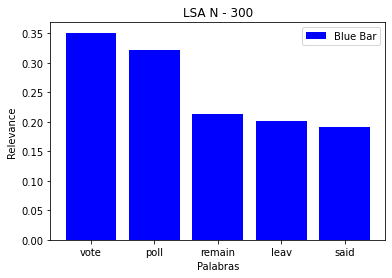

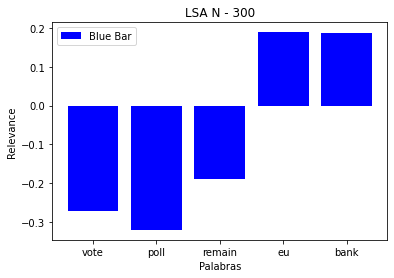

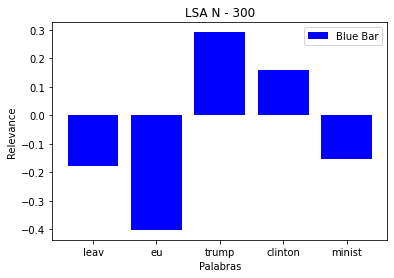

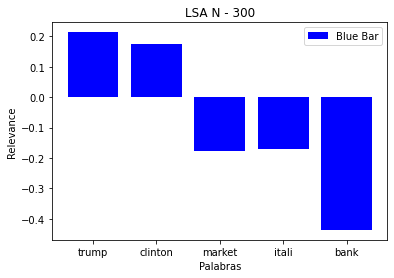

In [ ]:
x1 = ["vote","poll","remain" ,"leav" ,"said"]
y1 = [0.351, 0.322, 0.214, 0.202, 0.192] 
graficaLSAN(x1,y1,300)

x1 = ["vote","poll","remain","eu","bank"]
y1 = [-0.271,-0.320,-0.188,0.189,0.186] 
graficaLSAN(x1,y1,300)


x1 =["leav", "eu", "trump", "clinton", "minist"]
y1 =[-0.178,-0.402,0.291,0.159,-0.153]
graficaLSAN(x1,y1,300)

x1 =["trump", "clinton","market", "itali", "bank"]
y1 =[0.213, 0.175, -0.178,-0.169, -0.436]
graficaLSAN(x1,y1,300)

## Ejercicio 7

Averigue el funcionamiento de la función `CoherenceModel` del paquete `gensim.models.coherencemodel`. Mediante esta función calcule el valor de coherencia para configuraciones de diferentes temas (deste 2 hasta 8) usando el dataset del ejercicio anterior y muestre un gráfico con estos valores. Para este dataset, ¿cuál es la configuración de número de temas que maximiza el coeficiente de coherencia?.

In [ ]:

from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def getCoherence(n_topics):
  words = 10
  document_list = load_data("", "articles.txt")
  clean_text = preprocess_data(document_list)
  dictionary, doc_term_matrix = prepare_corpus(clean_text)
  model = create_gensim_lsa_model(clean_text, n_topics, words)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=model, texts=clean_text, dictionary=dictionary, coherence='c_v')
  return coherence_model_lda.get_coherence()


In [ ]:
n_topics = range(2,9)

coherences = []

for n_topic in n_topics:
  coherences.append((n_topic, getCoherence(n_topic)))

100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"remain" + -0.186*"bank" + -0.163*"trump" + 0.163*"station" + -0.158*"said" + -0.157*"would" + -0.138*"new"')]
100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.322*"poll" + 0.214*"remain" + 0.202*"leav" + 0.192*"said" + 0.180*"eu" + 0.144*"station" + 0.144*"referendum" + 0.139*"peopl" + 0.137*"would"'), (1, '0.320*"poll" + 0.271*"vote" + -0.189*"eu" + 0.188*"remain" + -0.186*"bank" + -0.163*"trump" + 0.163*"station" + -0.158*"said" + -0.157*"would" + -0.138*"new"'), (2, '0.402*"eu" + -0.291*"trump" + 0.178*"leav" + -0.159*"clinton" + 0.153*"minist" + 0.143*"uk" + 0.137*"britain" + -0.129*"new" + -0.124*"bank" + -0.112*"republican"')]
100 documentos
Total Number of Documents: 100
[(0, '0.351*"vote" + 0.

In [ ]:
# coherencias:
coherences

# N. de topics, coherencia

[(2, 0.6503788312896475),
 (3, 0.6684692109168987),
 (4, 0.5712851014753804),
 (5, 0.7015957443790655),
 (6, 0.6523017244019081),
 (7, 0.6065047133278103),
 (8, 0.5674144102717437)]

## Ejercicio 8

#### LDA

Analice y ejecute el código a continuación

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 6.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5aed04ba2605bdc3830ff1fd6eb204c1a6982731bb9344c0ad4daca59fff88f5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pandas as pd

# Load the regular expression library
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
from gensim import corpora
import pyLDAvis.gensim
import pickle
import pyLDAvis
import pprint
from wordcloud import WordCloud
import numpy as np
import tqdm


Cargando y limpiando los datos

In [ ]:
# Read data into papers
papers = pd.read_csv('papers_2.csv')

# Remove the columns
papers = papers.drop(columns=['id', 'title', 'abstract', 
                              'event_type', 'pdf_name', 'year'], axis=1)

# sample only 100 papers
papers = papers.sample(100)

# Print out the first rows of papers
papers.head()

,paper_text
645,Bayesian Modeling of Facial Similarity\n\nBaba...
4493,Learning Efficient Random Maximum A-Posteriori...
4929,Efficient learning by implicit exploration in ...
686,Utilizing Time: Asynchronous Binding\n\nBradle...
6059,Nested Mini-Batch K-Means\nFranc?ois Fleuret\n...


Remover puntuaciones y transformar palabras a minúsculas 

In [ ]:
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()


<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: Dep

645     bayesian modeling of facial similarity\n\nbaba...
4493    learning efficient random maximum a-posteriori...
4929    efficient learning by implicit exploration in ...
686     utilizing time: asynchronous binding\n\nbradle...
6059    nested mini-batch k-means\nfrancois fleuret\ni...
Name: paper_text_processed, dtype: object

Tokenización y remoción de puntuaciones

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['bayesian', 'modeling', 'of', 'facial', 'similarity', 'baback', 'moghaddam', 'mitsubishi', 'electric', 'research', 'laboratory', 'broadway', 'cambridge', 'ma', 'usa', 'babackcomerlcom', 'tony', 'jebara', 'and', 'alex', 'pentland', 'massachusettes', 'institute', 'of', 'technology', 'ames', 'st', 'cambridge', 'ma', 'usa']


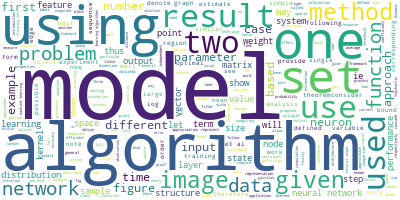

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Creando modelos de bigramas y trigramas

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Remover stopwords, crear los bigramas y lematizar 

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['model', 'facial', 'similarity', 'massachusette', 'ame', 'comediamitedu', 'abstract', 'previous', 'work', 'advance', 'new', 'technique', 'direct', 'visual', 'matching', 'image', 'purpose', 'face_recognition', 'image', 'retrieval', 'use', 'probabilistic', 'measure', 'similarity', 'base', 'primarily', 'map', 'analysis', 'image', 'difference']


Data transformation: Corpus and Dictionary

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 4), (17, 1), (18, 2), (19, 1), (20, 5), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 8), (27, 1), (28, 5), (29, 1)]


Construyendo el modelo base 

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Mostrando los tópicos del modelo

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.011*"set" + 0.010*"feature" + 0.010*"model" + 0.008*"use" + 0.008*"object" + 0.007*"kernel" + 0.007*"condition" + 0.007*"learn" + 0.006*"function" + 0.006*"algorithm"'), (1, '0.013*"model" + 0.012*"use" + 0.009*"network" + 0.008*"learn" + 0.008*"state" + 0.007*"time" + 0.007*"input" + 0.006*"neural" + 0.006*"datum" + 0.006*"show"'), (2, '0.012*"model" + 0.011*"use" + 0.008*"algorithm" + 0.008*"function" + 0.008*"learn" + 0.007*"problem" + 0.007*"result" + 0.007*"set" + 0.006*"sample" + 0.006*"show"'), (3, '0.023*"network" + 0.013*"task" + 0.012*"neural" + 0.012*"layer" + 0.011*"feature" + 0.008*"use" + 0.008*"input" + 0.007*"result" + 0.007*"output" + 0.007*"regression"'), (4, '0.030*"image" + 0.010*"network" + 0.010*"use" + 0.009*"layer" + 0.009*"tensor" + 0.008*"map" + 0.008*"input" + 0.007*"model" + 0.007*"learn" + 0.006*"number"'), (5, '0.015*"model" + 0.015*"layer" + 0.010*"use" + 0.007*"term" + 0.006*"study" + 0.006*"sample" + 0.006*"image" + 0.006*"learn" + 0.006*"time" 

Calculando la coherencia del modelo

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.28567464096399375


Hyperparameter tuning

Nota: este proceso puede tardar un tiempo considerable. Se generará un archivo (`lda_tuning_results.csv`) con los resultados

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


Se han truncado las últimas 5000 líneas del flujo de salida.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different 

Generando el modelo con los valores encontrados en el proceso anterior

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)


# Print the Keyword in the 8 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0, '0.009*"feature" + 0.008*"set" + 0.008*"model" + 0.007*"use" + 0.007*"method" + 0.006*"kernel" + 0.006*"object" + 0.005*"image" + 0.005*"learn" + 0.005*"function"'), (1, '0.014*"network" + 0.010*"use" + 0.009*"model" + 0.008*"input" + 0.008*"neural" + 0.007*"learn" + 0.007*"neuron" + 0.006*"time" + 0.006*"output" + 0.005*"show"'), (2, '0.010*"use" + 0.009*"model" + 0.008*"algorithm" + 0.008*"set" + 0.008*"learn" + 0.007*"function" + 0.007*"problem" + 0.006*"give" + 0.006*"result" + 0.006*"distribution"'), (3, '0.007*"arm" + 0.005*"depth" + 0.005*"layer" + 0.004*"network" + 0.004*"set" + 0.004*"problem" + 0.003*"neural" + 0.003*"recursive" + 0.003*"decision" + 0.003*"sample_complexity"'), (4, '0.017*"image" + 0.004*"map" + 0.004*"range" + 0.004*"document" + 0.003*"node" + 0.003*"hsom" + 0.003*"depth" + 0.003*"presynaptic" + 0.003*"high_resolution" + 0.002*"figure"'), (5, '0.006*"term" + 0.006*"study" + 0.004*"update" + 0.004*"decoder" + 0.004*"brain" + 0.003*"model" + 0.003*"use" +

Visualización de los temas

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.136267 -0.028802       1        1  39.047223
1      0.097905  0.068089       2        1  31.033905
0      0.083318 -0.049919       3        1  16.560962
6      0.017862  0.021878       4        1   7.478050
5     -0.057816 -0.001647       5        1   2.216399
4     -0.080313  0.014301       6        1   1.824775
3     -0.071239 -0.017006       7        1   1.496438
7     -0.125984 -0.006895       8        1   0.342249, topic_info=             Term         Freq        Total Category  logprob  loglift
262         model  1551.000000  1551.000000  Default  30.0000  30.0000
203         image   576.000000   576.000000  Default  29.0000  29.0000
684       network   936.000000   936.000000  Default  28.0000  28.0000
1393        layer   379.000000   379.000000  Default  27.0000  27.0000
1417       neuron   338.000000   338.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
262         model     0.479989  1551.067858   Topic8  -7.0556  -2.4033
828         study     0.315998   131.448277   Topic8  -7.4737  -0.3532
693       observe     0.299565   127.870387   Topic8  -7.5271  -0.3791
253           may     0.289801   339.521504   Topic8  -7.5602  -1.3887
1082  observation     0.281755   183.794913   Topic8  -7.5884  -0.8032

[544 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4344      1  0.045972  acoustic
4344      2  0.091944  acoustic
4344      3  0.045972  acoustic
4344      4  0.781523  acoustic
889       1  0.733073    action
...     ...       ...       ...
430       7  0.020263      word
1233      1  0.911957        wt
1233      2  0.052112        wt
1233      3  0.026056        wt
1233      4  0.026056        wt

[2138 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 7, 6, 5, 4, 8])

### Poner en práctica lo aprendido

Seleccione un dataset cualquiera y realice un análisis similar al descrito en este ejercicio. Determine:

a) cuantos temas existen <br>
b) cuales son los temas más relevantes <br>
c) ¿Es posible ponerle etiquetas a los temas encontrados? <br>

In [ ]:
# Insertar su código aquí

import pandas as pd

# Load the regular expression library
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
from gensim import corpora
import pyLDAvis.gensim
import pickle
import pyLDAvis
import pprint
from wordcloud import WordCloud
import numpy as np
import tqdm


In [ ]:
# Read data into news
news = pd.read_csv('abcnews-date-text.csv')
news.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:

# Remove the columns
news = news.drop(columns=['publish_date'], axis=1)

# sample only 100 papers
news = news.sample(100)

# Print out the first rows of papers
news.head()

,headline_text
873323,nadal sharapova into madrid semis serena withd...
672703,abc entertainment
211530,nominations open for gladstone council by elec...
131189,environment in crisis new acf head warns
477826,theophanous quits politics


In [ ]:
# Remove punctuation
news['headline_text_processed'] = news['headline_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
news['headline_text_processed'] = news['headline_text_processed'].map(lambda x: x.lower())

# Print out the first rows of news
news['headline_text_processed'].head()


<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: Dep

873323    nadal sharapova into madrid semis serena withd...
672703                                    abc entertainment
211530    nominations open for gladstone council by elec...
131189             environment in crisis new acf head warns
477826                           theophanous quits politics
Name: headline_text_processed, dtype: object

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = news.headline_text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['nadal', 'sharapova', 'into', 'madrid', 'semis', 'serena', 'withdraws']


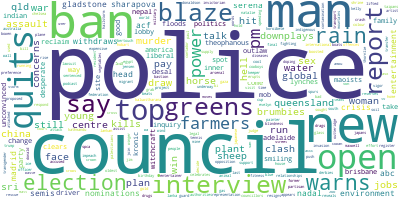

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(news['headline_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

[]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.038*"police" + 0.020*"report" + 0.020*"murder" + 0.020*"find" + 0.020*"income" + 0.020*"suspect" + 0.020*"management" + 0.020*"welfare" + 0.020*"body" + 0.020*"man"'), (1, '0.018*"blaze" + 0.018*"sex" + 0.018*"global" + 0.018*"woman" + 0.018*"rain" + 0.018*"pop" + 0.018*"malaysian" + 0.018*"folk" + 0.018*"tv" + 0.018*"audience"'), (2, '0.017*"say" + 0.017*"new" + 0.017*"draw" + 0.017*"clash" + 0.017*"qld" + 0.017*"promise" + 0.017*"plan" + 0.017*"well" + 0.017*"rural" + 0.017*"need"'), (3, '0.044*"open" + 0.030*"concern" + 0.016*"talk" + 0.016*"move" + 0.016*"hell" + 0.016*"dissenter" + 0.016*"sack" + 0.016*"turnbull" + 0.016*"quiet" + 0.016*"indigenous"'), (4, '0.032*"attack" + 0.017*"brumbie" + 0.017*"top" + 0.017*"sheep" + 0.017*"new" + 0.017*"soil" + 0.017*"try" + 0.017*"table" + 0.017*"disease" + 0.017*"shark"'), (5, '0.035*"quit" + 0.035*"power" + 0.018*"election" + 0.018*"run" + 0.018*"crow" + 0.018*"time" + 0.018*"invictorian" + 0.018*"team" + 0.018*"reserve" + 0.018*"c

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.49529853350392583


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)


# Print the Keyword in the 8 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0, '0.010*"blaze" + 0.010*"report" + 0.007*"bomb" + 0.007*"roadside" + 0.007*"suffer" + 0.007*"unit" + 0.007*"woman" + 0.007*"blast" + 0.007*"inhalation" + 0.007*"gas"'), (1, '0.010*"find" + 0.010*"concern" + 0.007*"entertainer" + 0.007*"global" + 0.007*"folk" + 0.007*"pop" + 0.007*"audience" + 0.007*"sentence" + 0.007*"offence" + 0.007*"migrant"'), (2, '0.006*"hold" + 0.006*"crown" + 0.006*"lift" + 0.006*"health" + 0.006*"plan" + 0.006*"promise" + 0.006*"qld" + 0.006*"speed" + 0.006*"run" + 0.006*"talk"'), (3, '0.013*"police" + 0.010*"top" + 0.010*"ban" + 0.006*"word" + 0.006*"judge" + 0.006*"work" + 0.006*"war" + 0.006*"painter" + 0.006*"impeach" + 0.006*"move"'), (4, '0.012*"police" + 0.009*"clash" + 0.009*"kill" + 0.009*"attack" + 0.006*"green" + 0.006*"eagle" + 0.006*"earn" + 0.006*"respect" + 0.006*"preference" + 0.006*"accuse"'), (5, '0.009*"horse" + 0.009*"quit" + 0.006*"blindness" + 0.006*"follow" + 0.006*"scare" + 0.006*"sex" + 0.006*"reveal" + 0.006*"japanese" + 0.006*"gla

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.019844 -0.006463       1        1  18.231201
7      0.001664  0.015628       2        1  15.324766
5      0.011512 -0.011417       3        1  13.648951
3     -0.004563  0.004377       4        1  13.066737
2      0.002185 -0.001981       5        1  11.680086
1      0.002321 -0.001970       6        1   9.938128
0      0.003975  0.000842       7        1   9.625321
6      0.002749  0.000984       8        1   8.484811, topic_info=           Term      Freq     Total Category  logprob  loglift
50        blaze  1.000000  1.000000  Default  30.0000  30.0000
15         rain  1.000000  1.000000  Default  29.0000  29.0000
3          warn  1.000000  1.000000  Default  28.0000  28.0000
40       police  2.000000  2.000000  Default  27.0000  27.0000
79       report  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
85        legal  0.091441  1.133763   Topic8  -5.7658  -0.0507
169  management  0.091441  1.133763   Topic8  -5.7658  -0.0507
94        clash  0.091441  1.410492   Topic8  -5.7658  -0.2691
96        fight  0.091441  1.215295   Topic8  -5.7658  -0.1202
98        storm  0.091441  1.215295   Topic8  -5.7658  -0.1202

[332 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
121       1  0.709087  attack
94        1  0.708972   clash
29        1  0.708972    kill
40        1  0.427979  police
40        4  0.427979  police, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 4, 3, 2, 1, 7])

**a) ¿Cuantos temas existen?**

Existen 10 temas

**b) ¿Cuales son los temas más relevantes?**

Analizando bajo el mismo criterio que el ejercicio anterior (5 palabras más representativas de cada tópico), se tienen los temas bajo las siguientes palabras:

- policía, informe, asesinato, buscar, ingresos
- resplandor, sexo, global, mujer, lluvia
- decir, nuevo, dibujar, choque, qld
- abrir, preocupación, hablar, mover, infierno
- ataque, brumbie, top, oveja, nuevo
- salir, poder, elección, correr, cuervo
- ganar, caballo, perder, correr, vacunación
- policía, incendio, agua, decir, prohibición
- policía, golpe, matar, levantar, prohibir
- advertir, superior, vidrio, ceguera, color 

**c) ¿Es posible ponerle etiquetas a los temas encontrados?**

Depende, hay temas en los cuales si se puede etiquetar, sin embargo, hay otros que no son posibles de etiquetar. Esto puede ser por un solapamiento de temas, o por terminos que no representen en una etiqueta. Por ejemplo, el primer topico puede etiquetarse como crimen, sin embargo el segundo no se puede etiquetar.